In [13]:
import pandas as pd

# set filename: 
filename = '61_RZ_2737165_Aug-14-14-09-12_xy.csv'

# open the file
eye_track_df = pd.read_csv(f'cleaned_data/{filename}', sep=',')
# add a column named time and fill it with the row number
eye_track_df['Time'] = eye_track_df.index
# the time column starts with a value 0. make it start with 1
eye_track_df['Time'] += 1

# set the 'Time' column as the index
eye_track_df.set_index('Time', inplace=True)

# downsample the data to 100 Hz
eye_track_df_resampled = eye_track_df.iloc[::10, :]


# load in meta_data.csv
meta_data_df = pd.read_csv('meta_data.csv')

# filter out all observations that are not "ms_pacman"
meta_data_df = meta_data_df[meta_data_df['GameName'] == 'ms_pacman']

# save the data from the row with trial_id 61, fetch the value 61 from the first 2 values of the filename
trial_id = int(filename[:2])
df_name = f'df_{trial_id}'
df_name = meta_data_df[meta_data_df['trial_id'] == trial_id]

# add avg_error value to eye_track_df_resampled
eye_track_df_resampled['avg_error'] = df_name['avg_error'].values[0]

# print highest x_pos and y_pos values
print(eye_track_df_resampled['x_pos'].max())
print(eye_track_df_resampled['y_pos'].max())



243.97
173.93


/var/folders/0y/qk6gd0b56d3d03tn2rdvskc00000gn/T/ipykernel_30481/2476920181.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_track_df_resampled['avg_error'] = df_name['avg_error'].values[0]


0.34438350715444793
[22  1  1 ...  1  1  1]


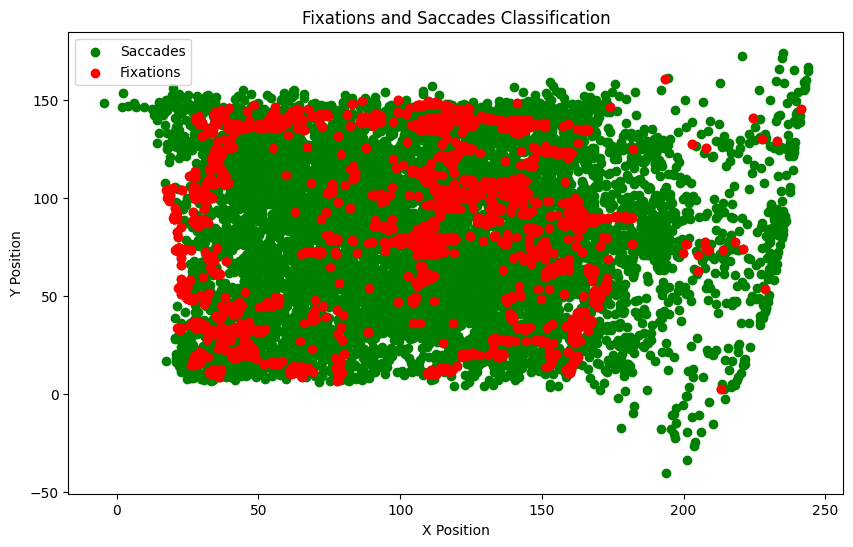

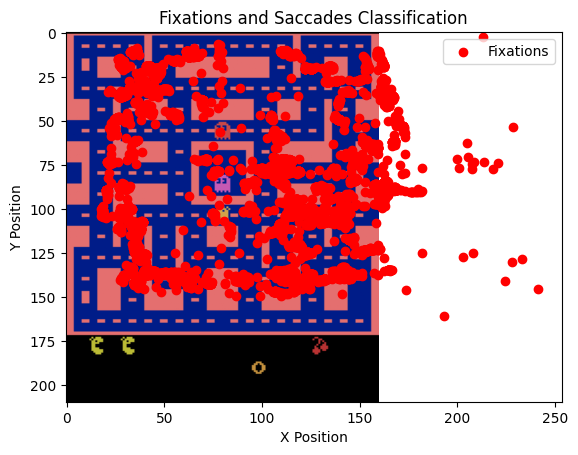

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def classify_fixations_saccades(x_positions, y_positions, velocity_threshold=30, duration_threshold=0.003):
    """
    Classify fixations and saccades based on velocity thresholds.
    
    Parameters:
        x_positions (numpy.ndarray): Array of x positions.
        y_positions (numpy.ndarray): Array of y positions.
        velocity_threshold (float): Threshold for saccade detection based on velocity.
        duration_threshold (float): Minimum duration for a fixation.

    Returns:
        fixation_indices (numpy.ndarray): Indices of fixations.
        saccade_indices (numpy.ndarray): Indices of saccades.
    """
    # Calculate velocity
    velocity = np.sqrt(np.diff(x_positions)**2 + np.diff(y_positions)**2)
    print(np.median(velocity))

    # Identify saccades based on velocity threshold
    saccade_indices = np.where(velocity > velocity_threshold)[0] + 1  # Shift by 1 to match with the original data

    # Identify fixations based on inter-saccadic intervals
    inter_saccadic_intervals = np.diff(saccade_indices)
    print(inter_saccadic_intervals)
    fixation_indices = np.where(inter_saccadic_intervals <= duration_threshold * len(velocity))[0]

    return fixation_indices, saccade_indices

# Example Usage:
# Generate example eye tracking data
x_positions = np.array(eye_track_df_resampled['x_pos'])
y_positions = np.array(eye_track_df_resampled['y_pos'])

# Classify fixations and saccades
fixation_indices, saccade_indices = classify_fixations_saccades(x_positions, y_positions, velocity_threshold=2, duration_threshold=0.003)

# Plot results
plt.figure(figsize=(10, 6))
#plt.plot(x_positions, y_positions, label='Eye Movements')
plt.scatter(x_positions[saccade_indices], y_positions[saccade_indices], c='g', label='Saccades')
plt.scatter(x_positions[fixation_indices], y_positions[fixation_indices], c='r', label='Fixations')
plt.legend()
plt.title('Fixations and Saccades Classification')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

#overlay the plot on the png file
import matplotlib.image as mpimg

img = mpimg.imread('ms_pacman/61_RZ_2737165_Aug-14-14-09-12/RZ_2737165_158.png')
# the top left corner is coordinate (0,0) in x-position and y-position. move the image accordingly




# Plot results
imgplot = plt.imshow(img, origin='upper', aspect='auto')
# plt.scatter(x_positions[saccade_indices], y_positions[saccade_indices], c='g', label='Saccades')
plt.scatter(x_positions[fixation_indices], y_positions[fixation_indices], c='r', label='Fixations')
plt.legend()
plt.title('Fixations and Saccades Classification')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()


